In [72]:
# Importing the libraries
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import datetime
from datetime import date
matplotlib.rcParams["figure.figsize"] = (30,10)


In [3]:
df1 = pd.read_csv('/content/FinalModelTrain2.csv')
df1.head()

Id inwarddate  tokenid  ...      status deliverystaus  UnLoadCharges
0  1.0  1/31/2019     37.0  ...  Authorized    Fully Paid         1505.0
1  2.0  1/31/2019     38.0  ...  Authorized    Fully Paid         1406.0
2  3.0  1/31/2019     39.0  ...  Authorized    Fully Paid           66.0
3  4.0  1/31/2019     40.0  ...  Authorized    Fully Paid           88.0
4  5.0  1/31/2019     41.0  ...  Authorized    Fully Paid          248.0

[5 rows x 15 columns]

Feature Engineering

In [65]:
df2=df1.drop(['customerid','status','deliverystaus','UnLoadCharges','Id','inwarddate','crno','lotid','tokenid'],axis='columns')

Data Cleaning: Handle NA values

In [6]:
df2.isna().any()

itemid               True
warehouseid          True
Total_sqft           True
totalqty_noofbags    True
total_weight         True
storagemode          True
dtype: bool

In [68]:
df2=df2.dropna()

In [71]:
df2.head()

itemid warehouseid  ... total_weight  storagemode
0   Kollu 50kgs           A  ...      13690.0    In Weight
1   Kollu 50kgs           A  ...      12785.0    In Weight
2  Paakku 45kgs           A  ...        600.0    In Weight
3  Paakku 45kgs           A  ...        800.0    In Weight
4   Solam 50kgs           B  ...       2250.0    In Weight

[5 rows x 6 columns]

In [70]:
df2.isna().any()

itemid               False
warehouseid          False
Total_sqft           False
totalqty_noofbags    False
total_weight         False
storagemode          False
dtype: bool

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1198
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   itemid             1199 non-null   object 
 1   warehouseid        1199 non-null   object 
 2   Total_sqft         1199 non-null   object 
 3   totalqty_noofbags  1199 non-null   float64
 4   total_weight       1199 non-null   float64
 5   storagemode        1199 non-null   object 
dtypes: float64(2), object(4)
memory usage: 65.6+ KB


In [10]:
df2['itemid'].value_counts()

Kottaipuli               452
Sarugupuli 10kgs         362
sundal 50kgs              73
Kollu 50kgs               53
Milagai Vathal New        39
mosai50kgs                27
Thattaipairu 50kg         24
OTTU PULI NEW             24
sarugupuli 30kg           20
Sarugupuli                20
Sarugupuli 30KGS          19
Thosaipuli 40kgs          10
Thosaipuli 50kgs          10
Sarukupuli 5kgs            9
ullundu 50kgs              8
Pasi payar                 8
Paakku 45kgs               6
More Milakai               5
Sundal 30kgs               4
Sarugupuli 20kgs           3
Sarugupuli 15kgs           3
Solam 50kgs                3
Seyakkai                   3
Pottato                    3
Sarugupuli 40kgs           2
Ellu                       2
Sarugupuli 25Kgs           2
Beens Seed                 1
Dates                      1
Thuvaram Paruppu 50kg      1
Milagai Vathal 40kg        1
Vengayam Seed              1
Name: itemid, dtype: int64

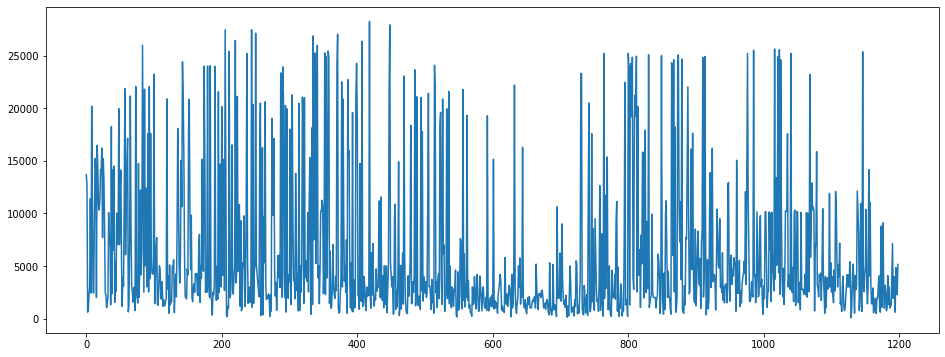

In [11]:
df2['total_weight'].plot(figsize=(16,6))

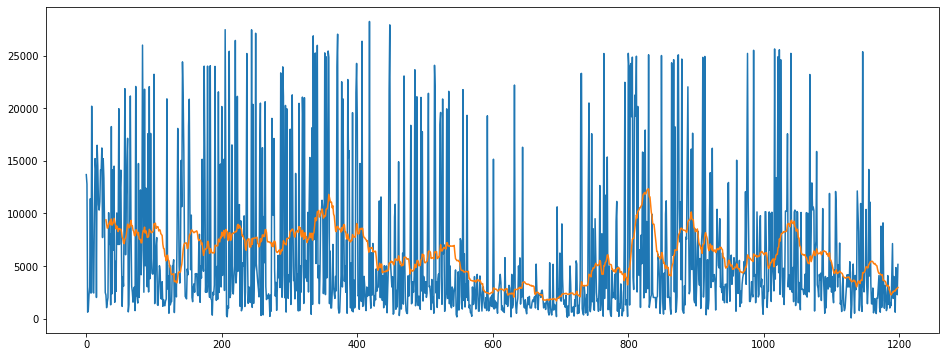

In [12]:
df2['total_weight'].plot(figsize=(16,6))
df2.rolling(window=30).mean()['total_weight'].plot()

In [13]:
training_set=df2['total_weight']
training_set=pd.DataFrame(training_set)

In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 956):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [17]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [56]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1000,batch_size = 128)


Epoch 1/1000
896/896 [==============================] - 5s 6ms/step - loss: 0.0103
Epoch 2/1000
896/896 [==============================] - 4s 4ms/step - loss: 0.0128
Epoch 3/1000
896/896 [==============================] - 4s 4ms/step - loss: 0.0093
Epoch 4/1000
896/896 [==============================] - 3s 3ms/step - loss: 0.0084
Epoch 5/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0083
Epoch 6/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0072
Epoch 7/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0070
Epoch 8/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0074
Epoch 9/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0069
Epoch 10/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0063
Epoch 11/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0071
Epoch 12/1000
896/896 [==============================] - 2s 3ms/step - loss: 0.0064
E

In [57]:
# Part 3 - Making the predictions and visualising the results - SELF MADE TEST DATA
dataset_test = pd.read_csv('/content/InwardTestSet2.csv')

In [58]:
dataset_test.tail()

Id inwarddate  tokenid  ...     status deliverystaus  UnLoadCharges
296  1809  5/16/2020     5185  ...  Completed       Pending            111
297  1810  5/16/2020     5186  ...  Completed       Pending            333
298  1811  5/16/2020     5187  ...  Completed       Pending            173
299  1812  5/16/2020     5188  ...  Completed       Pending            432
300  1813  5/18/2020     5190  ...  Completed       Pending            378

[5 rows x 15 columns]

In [59]:
real_total_weight = dataset_test.iloc[:, 10:11].values
real_total_weight=pd.DataFrame(real_total_weight)

In [60]:
test_set=dataset_test['total_weight']
test_set=pd.DataFrame(test_set)

In [61]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total_weight  301 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [62]:
# Getting the predicted total_weight for test set
dataset_total = pd.concat((df2['total_weight'], dataset_test['total_weight']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 360):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_storage_value = regressor.predict(X_test)
predicted_storage_value = sc.inverse_transform(predicted_storage_value)

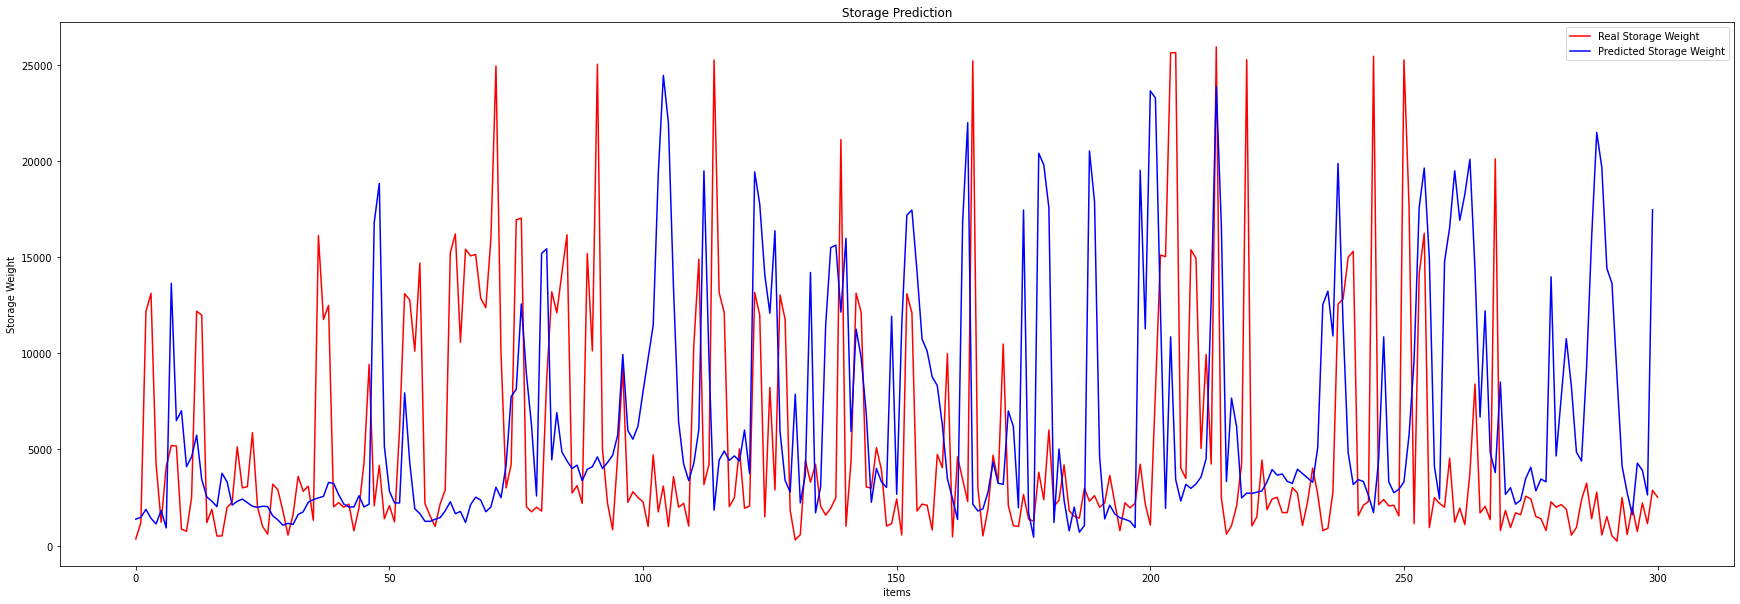

In [63]:
# Visualising the results
plt.plot(real_total_weight, color = 'red', label = 'Real Storage Weight')
plt.plot(predicted_storage_value, color = 'blue', label = 'Predicted Storage Weight')
plt.title('Storage Prediction')
plt.xlabel('items')
plt.ylabel('Storage Weight')
plt.legend()
plt.show()

Storage Weight Prediction



In [73]:
df3=df2.copy()

In [74]:
df3.head()

itemid warehouseid  ... total_weight  storagemode
0   Kollu 50kgs           A  ...      13690.0    In Weight
1   Kollu 50kgs           A  ...      12785.0    In Weight
2  Paakku 45kgs           A  ...        600.0    In Weight
3  Paakku 45kgs           A  ...        800.0    In Weight
4   Solam 50kgs           B  ...       2250.0    In Weight

[5 rows x 6 columns]

Feature Engineering

Data Cleaning: Handle NA values

In [75]:
df3.isnull().sum()

itemid               0
warehouseid          0
Total_sqft           0
totalqty_noofbags    0
total_weight         0
storagemode          0
dtype: int64

In [76]:
df3.shape

(1199, 6)

In [77]:
df3.head()

itemid warehouseid  ... total_weight  storagemode
0   Kollu 50kgs           A  ...      13690.0    In Weight
1   Kollu 50kgs           A  ...      12785.0    In Weight
2  Paakku 45kgs           A  ...        600.0    In Weight
3  Paakku 45kgs           A  ...        800.0    In Weight
4   Solam 50kgs           B  ...       2250.0    In Weight

[5 rows x 6 columns]

In [78]:
df4 = df3.dropna()

In [80]:
df4.head()

itemid warehouseid  ... total_weight  storagemode
0   Kollu 50kgs           A  ...      13690.0    In Weight
1   Kollu 50kgs           A  ...      12785.0    In Weight
2  Paakku 45kgs           A  ...        600.0    In Weight
3  Paakku 45kgs           A  ...        800.0    In Weight
4   Solam 50kgs           B  ...       2250.0    In Weight

[5 rows x 6 columns]

Above shows that total_sqft can be a range (e.g. 5500-7000). For such case we can just take average of min and max value in the range. I am going to just drop such corner cases to keep things simple

In [81]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [82]:
df5=df4.copy()

In [83]:
df5.Total_sqft = df5.Total_sqft.apply(convert_sqft_to_num)
df5 = df5[df5.Total_sqft.notnull()]
df5.head()

itemid warehouseid  ...  total_weight  storagemode
0   Kollu 50kgs           A  ...       13690.0    In Weight
1   Kollu 50kgs           A  ...       12785.0    In Weight
2  Paakku 45kgs           A  ...         600.0    In Weight
3  Paakku 45kgs           A  ...         800.0    In Weight
4   Solam 50kgs           B  ...        2250.0    In Weight

[5 rows x 6 columns]

Feature Engineering Add new feature called Weight stored per square feet

In [84]:
df6 = df5.copy()
df6['weightstored_persqft'] = df5['total_weight']/df5['Total_sqft']
df6.head()

itemid warehouseid  ...  storagemode  weightstored_persqft
0   Kollu 50kgs           A  ...    In Weight              2.190400
1   Kollu 50kgs           A  ...    In Weight              2.045600
2  Paakku 45kgs           A  ...    In Weight              0.096000
3  Paakku 45kgs           A  ...    In Weight              0.128000
4   Solam 50kgs           B  ...    In Weight              0.818182

[5 rows x 7 columns]

In [85]:
df6_stats = df6['weightstored_persqft'].describe()
df6_stats

count    1199.000000
mean        1.229296
std         1.556311
min         0.008000
25%         0.283200
50%         0.577500
75%         1.553273
max        10.158182
Name: weightstored_persqft, dtype: float64

In [86]:
df6.to_csv("bhp.csv",index=False)

Examine Items which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of Items

In [87]:
df6.itemid = df6.itemid.apply(lambda x: x.strip())
item_stats = df6['itemid'].value_counts(ascending=False)
item_stats

Kottaipuli               452
Sarugupuli 10kgs         362
sundal 50kgs              73
Kollu 50kgs               53
Milagai Vathal New        39
mosai50kgs                27
Thattaipairu 50kg         24
OTTU PULI NEW             24
sarugupuli 30kg           20
Sarugupuli                20
Sarugupuli 30KGS          19
Thosaipuli 40kgs          10
Thosaipuli 50kgs          10
Sarukupuli 5kgs            9
ullundu 50kgs              8
Pasi payar                 8
Paakku 45kgs               6
More Milakai               5
Sundal 30kgs               4
Sarugupuli 20kgs           3
Sarugupuli 15kgs           3
Solam 50kgs                3
Seyakkai                   3
Pottato                    3
Sarugupuli 40kgs           2
Ellu                       2
Sarugupuli 25Kgs           2
Beens Seed                 1
Dates                      1
Thuvaram Paruppu 50kg      1
Milagai Vathal 40kg        1
Vengayam Seed              1
Name: itemid, dtype: int64

In [88]:
item_stats.values.sum()

1199

In [89]:
len(item_stats[item_stats>3])

19

In [90]:
len(item_stats[item_stats<=3])

13

Dimensionality Reduction

Any Itemid having less than or equal to 3 data points should be tagged as "other" Item. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [91]:
item_stats_less_than_3 = item_stats[item_stats<=3]
item_stats_less_than_3

Sarugupuli 20kgs         3
Sarugupuli 15kgs         3
Solam 50kgs              3
Seyakkai                 3
Pottato                  3
Sarugupuli 40kgs         2
Ellu                     2
Sarugupuli 25Kgs         2
Beens Seed               1
Dates                    1
Thuvaram Paruppu 50kg    1
Milagai Vathal 40kg      1
Vengayam Seed            1
Name: itemid, dtype: int64

In [92]:
len(df6.itemid.unique())

32

In [93]:
df6.itemid = df6.itemid.apply(lambda x: 'other' if x in item_stats_less_than_3 else x)
len(df6.itemid.unique())

20

In [94]:
df6.head(5)

itemid warehouseid  ...  storagemode  weightstored_persqft
0   Kollu 50kgs           A  ...    In Weight              2.190400
1   Kollu 50kgs           A  ...    In Weight              2.045600
2  Paakku 45kgs           A  ...    In Weight              0.096000
3  Paakku 45kgs           A  ...    In Weight              0.128000
4         other           B  ...    In Weight              0.818182

[5 rows x 7 columns]

Outlier Removal Using Standard Deviation and Mean

In [95]:
df6.weightstored_persqft.describe()

count    1199.000000
mean        1.229296
std         1.556311
min         0.008000
25%         0.283200
50%         0.577500
75%         1.553273
max        10.158182
Name: weightstored_persqft, dtype: float64

In [96]:
df6.shape

(1199, 7)

In [97]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('itemid'):
        m = np.mean(subdf.weightstored_persqft)
        st = np.std(subdf.weightstored_persqft)
        reduced_df = subdf[(subdf.weightstored_persqft>(m-st)) & (subdf.weightstored_persqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(996, 7)

Let's check if for a given Item how does the weightstored_persqft look like

In [98]:
def plot_scatter_chart(df,itemid):
    warehouse_A = df[(df.itemid==itemid) & (df.warehouseid=="A")]
    warehouse_B = df[(df.itemid==itemid) & (df.warehouseid=="B")]
    warehouse_C = df[(df.itemid==itemid) & (df.warehouseid=="C")]
    warehouse_D = df[(df.itemid==itemid) & (df.warehouseid=="D")]
    warehouse_E = df[(df.itemid==itemid) & (df.warehouseid=="E")]

    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(warehouse_A.Total_sqft,warehouse_A.total_weight,color='blue',label='WAREHOUSE - A', s=50)
    plt.scatter(warehouse_B.Total_sqft,warehouse_B.total_weight,marker='+', color='green',label='WAREHOUSE -B ', s=50)
    plt.scatter(warehouse_C.Total_sqft,warehouse_C.total_weight,marker='+', color='red',label='WAREHOUSE - C', s=50)
    plt.scatter(warehouse_D.Total_sqft,warehouse_D.total_weight,marker='+', color='yellow',label='WAREHOUSE - D', s=50)
    plt.scatter(warehouse_E.Total_sqft,warehouse_E.total_weight,marker='+', color='violet',label='WAREHOUSE - E', s=50)
   
    plt.ylabel("Weight Stored (in KG's)")
    plt.title(itemid)
    plt.legend()
    


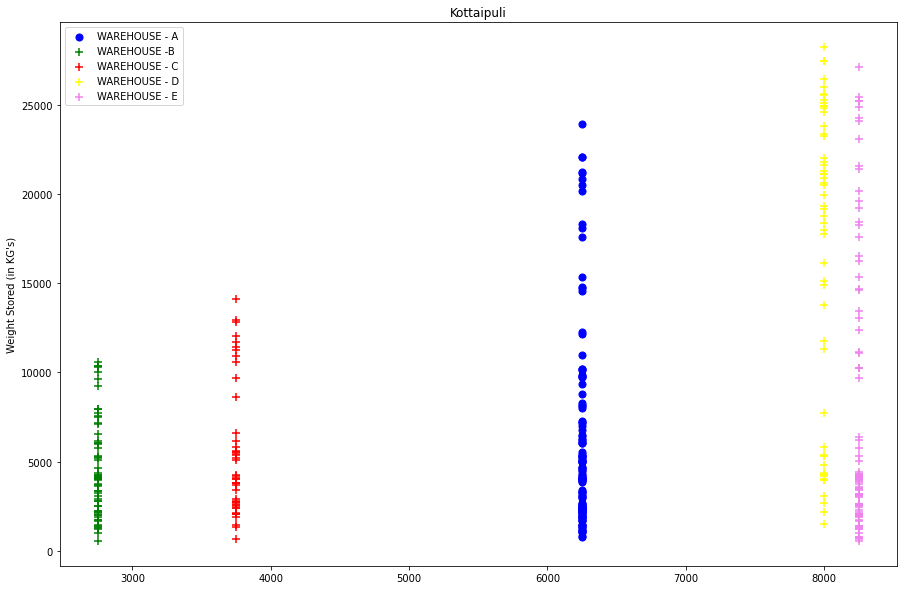

In [99]:
plot_scatter_chart(df7,"Kottaipuli")

In [100]:
df8=df7.copy()

Text(0, 0.5, 'Count')

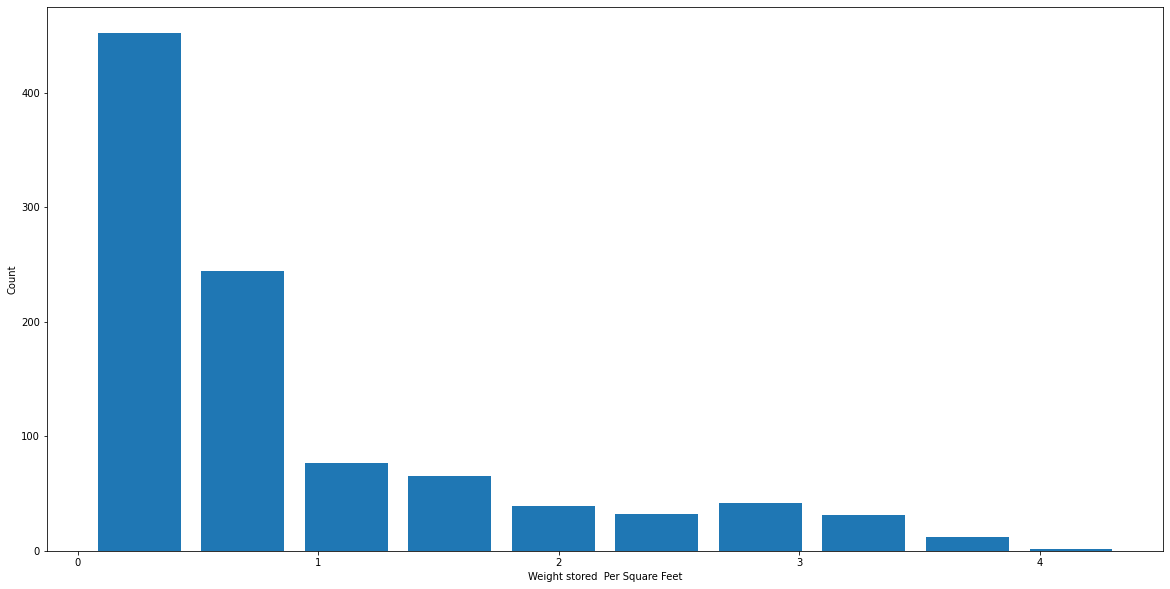

In [101]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.weightstored_persqft,rwidth=0.8)
plt.xlabel("Weight stored  Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

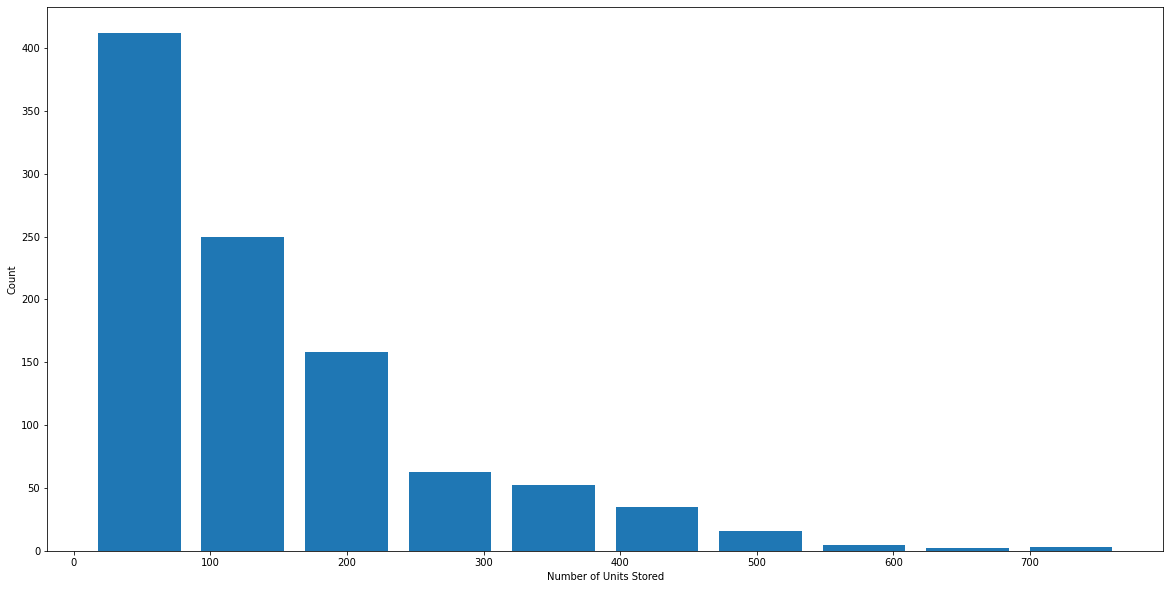

In [102]:
plt.hist(df8.totalqty_noofbags,rwidth=0.8)
plt.xlabel("Number of Units Stored")
plt.ylabel("Count")

Use One Hot Encoding For Items

In [103]:
df10=df8.copy()

In [104]:
dummies = pd.get_dummies(df10.itemid)
dummies.head(3)

Kollu 50kgs  Kottaipuli  ...  sundal 50kgs  ullundu 50kgs
0            1           0  ...             0              0
1            1           0  ...             0              0
2            1           0  ...             0              0

[3 rows x 20 columns]

In [105]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

itemid warehouseid  ...  sundal 50kgs  ullundu 50kgs
0  Kollu 50kgs           A  ...             0              0
1  Kollu 50kgs           A  ...             0              0
2  Kollu 50kgs          E   ...             0              0
3  Kollu 50kgs          E   ...             0              0
4  Kollu 50kgs           B  ...             0              0

[5 rows x 26 columns]

In [106]:
df12 = df11.drop('itemid',axis='columns')
df12.head(2)

warehouseid  Total_sqft  ...  sundal 50kgs  ullundu 50kgs
0           A      6250.0  ...             0              0
1           A      6250.0  ...             0              0

[2 rows x 25 columns]

In [107]:
df12=df12.drop(['warehouseid','weightstored_persqft','storagemode'],axis='columns')

Build Model

In [108]:
df12.shape

(996, 22)

In [109]:
X = df12.drop(['total_weight'],axis='columns')
X.head(3)

Total_sqft  totalqty_noofbags  ...  sundal 50kgs  ullundu 50kgs
0      6250.0              254.0  ...             0              0
1      6250.0              210.0  ...             0              0
2      8250.0              220.0  ...             0              0

[3 rows x 21 columns]

In [110]:
X.shape

(996, 21)

In [111]:
y = df12.total_weight
y.head(3)

0    12785.0
1    10520.0
2    11115.0
Name: total_weight, dtype: float64

In [112]:
len(y)

996

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [114]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8639723970836505

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [115]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#shufflesplit-equal randomization
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84008041, 0.85001445, 0.8509214 , 0.77484581, 0.87862994])

We can see that in 5 iterations we get a score above 75% all the time. 


Test the model for few properties

In [116]:
def predict_totall_weight(itemid,totalqty_noofbags,Total_sqft):    
    loc_index = np.where(X.columns==itemid)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = totalqty_noofbags
    x[1] = Total_sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [117]:
predict_totall_weight('Kollu 50kgs',271,6250.0,)

234692.4804149981

Export the tested model to a pickle file

In [118]:
import pickle
with open('PredictWeightStored.pickle','wb') as f:
    pickle.dump(lr_clf,f)

Export Item and column information to a file that will be useful later on in our prediction application

In [119]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))